In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

================= Netflix Movie Data ====================

In [287]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')


                    SUMMARY OF A DATA
            => This Dataframe consists 9837 rows and 9 columns
            =>No null values and no duplicate values are present in the dataset
            =>Original_Language and Poster_Url wouldn't be useful
            =>Genre column has comma separated values and whitespaces
            

       Questions:-
       Ques1. What is the most frequent genre of movies released on netflix?
       Ques2.Which has highest votes in vote avg column? 
       Ques3.What movie got the highest popularity?What it's genre
       Ques4.What movie got the lowest popularity?What it's genre
       Ques5.Which movie has the most filmmed movies?

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25793 entries, 0 to 25792
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25793 non-null  int32   
 1   Title         25793 non-null  object  
 2   Popularity    25793 non-null  float64 
 3   Vote_Count    25793 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25793 non-null  object  
dtypes: category(1), float64(1), int32(1), int64(1), object(2)
memory usage: 932.3+ KB


In [192]:
# first five genre of movies
df["Genre"].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [22]:
#checking for duplicated values
df.duplicated().sum()

0

In [24]:
#checking all statiscal value 
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [289]:
#converting Release date from string(object) datatype to datetime datatype
df["Release_Date"] = pd.to_datetime(df["Release_Date"])
#print(df["Release_Date"].dtypes)

df["Release_Date"] = df["Release_Date"].dt.year
print(df["Release_Date"])

0       2021
1       2022
2       2022
3       2021
4       2021
        ... 
9822    1973
9823    2020
9824    2016
9825    2021
9826    1984
Name: Release_Date, Length: 9827, dtype: int32


In [38]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,1970,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,1970,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,1970,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,1970,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,1970,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [293]:
#Dropping columns
cols = ["Overview","Original_Language","Poster_Url"]
df.drop(cols,axis=1,inplace=True)

Categorising Vote_Average column
we will create 4 categories :- "Poupular","Average","Below_average","Notpopular"
0-5 = not_popular
5-6 = below_Avg
6-7 = Avg
7-10 = Popular

In [295]:
def categories_col(df,col,labels):
    
    edges = [
        df[col].describe()["min"],
        df[col].describe()["25%"],
        df[col].describe()["50%"],
        df[col].describe()["75%"],
        df[col].describe()["max"]]
    df[col] = pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [297]:
labels = ["not_popular","below_avg","Avg","popular"]
categories_col(df,"Vote_Average",labels)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Avg,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Avg,"Music, Drama, History"


In [299]:
df

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Avg,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9822,1973,Badlands,13.357,896,popular,"Drama, Crime"
9823,2020,Violent Delights,13.356,8,not_popular,Horror
9824,2016,The Offering,13.355,94,not_popular,"Mystery, Thriller, Horror"
9825,2021,The United States vs. Billie Holiday,13.354,152,Avg,"Music, Drama, History"


In [260]:
#Counting different label values of "Vote_Average"
df["Vote_Average"].value_counts()

Vote_Average
not_popular    2467
popular        2450
Avg            2412
below_avg      2398
Name: count, dtype: int64

In [271]:
df.isnull().sum() 
# we have null values in "Vote_Average" so dropping these null values
df.dropna(inplace=True)
df.isnull().sum() 

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

----split genres into list and then explode our dataframe to have only have genre per row for each movie 

In [273]:
# converting into string
df["Genre"] = df["Genre"].astype(str)
df["Genre"]

0       Action, Adventure, Science Fiction
1                 Crime, Mystery, Thriller
2                                 Thriller
3       Animation, Comedy, Family, Fantasy
4         Action, Adventure, Thriller, War
                       ...                
9822                          Drama, Crime
9823                                Horror
9824             Mystery, Thriller, Horror
9825                 Music, Drama, History
9826           War, Drama, Science Fiction
Name: Genre, Length: 9727, dtype: object

In [311]:
df["Genre"] = df["Genre"].str.split(', ')
#explode will split it into different lines

df = df.explode("Genre").reset_index(drop=True)
#reset_index() method allows you reset the index back to the default 0, 1, 2 etc indexes.


In [313]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


Casting column into categories

In [205]:
df["Genre"] = df["Genre"].astype('category')
df["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [209]:
df.nunique()  # unique values in all columns

Release_Date         5893
Title                9513
Overview             9822
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      43
Genre                  19
Poster_Url           9827
dtype: int64

Ques1. What is the most frequent genre of movies released on netflix..........

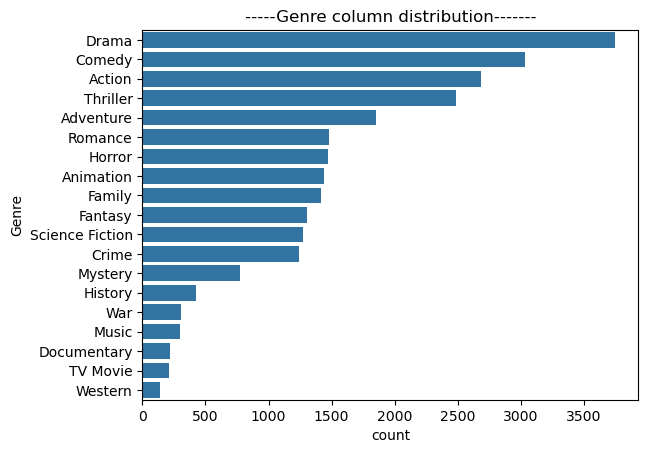

In [231]:
#sns.catplot(y="Genre",data=df,kind='count')
#==================>>> order=df["Genre"]:- will give the result in order of Genre
#==================>>> .value_counts().index:- will will count its value and make index of it
sns.countplot(y="Genre",data=df,order=df["Genre"].value_counts().index)
plt.title("-----Genre column distribution-------")
plt.show()

Ques2. Which has highest votes in vote avg column? 

In [262]:
df["Vote_Average"].head()

0      popular
1      popular
2    below_avg
3      popular
4          Avg
Name: Vote_Average, dtype: category
Categories (4, object): ['not_popular' < 'below_avg' < 'Avg' < 'popular']

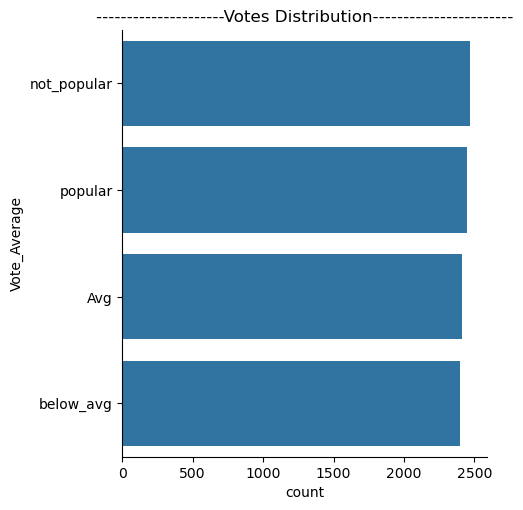

In [264]:
sns.catplot(y="Vote_Average",data=df,kind="count",order=df["Vote_Average"].value_counts().index)
plt.title("---------------------Votes Distribution-----------------------")
plt.show()

Ques3.What movie got the highest popularity?What it's genre

In [315]:
#checking Popularity
df[df["Popularity"] == df["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


Ques3.What movie got the lowest popularity?What it's genre

In [318]:
#checking Popularity
df[df["Popularity"] == df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,Avg,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,Avg,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,Avg,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


 Ques5.Which movie has the most filmmed movies?

Text(0.5, 1.0, '=================Release Date Column Distribution=====================')

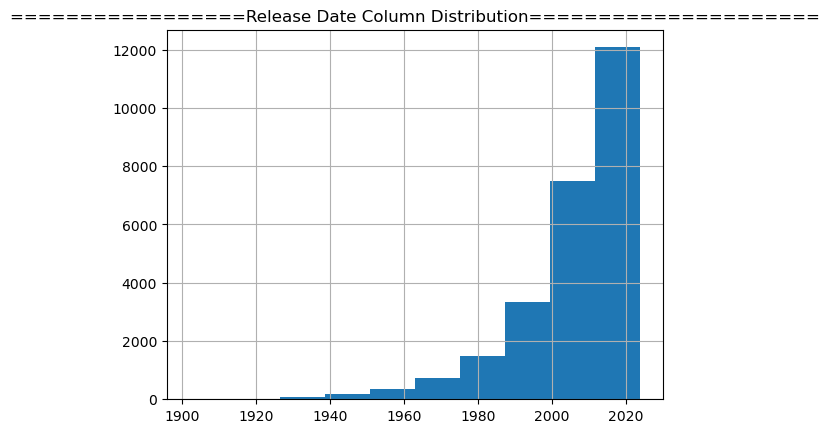

In [321]:
df["Release_Date"].hist()
plt.title("=================Release Date Column Distribution=====================")

=====>> Ending Summary
       Ques1.What is the most frequent genre of movies released on netflix?
       Drama Genre has the most frequent genre of movies with count of approx 3500 counts

       Ques2.Which has highest votes in vote avg column? 
       Drama again has highest vote 

       Ques3.What movie got the highest popularity?What it's genre
       Spiderman is the highest popular movie with genre Action,Adventure,Science fiction

       Ques4.What movie got the lowest popularity?What it's genre
       The United States vs. Billie Holiday	with genres Music,Drama,History and Threads with war,drama,science fiction,

       Ques5.Which movie has the most filmmed movies?
       2020 has the most filmmed movie year